<a href="https://colab.research.google.com/github/mahedishato/ML/blob/main/EDA_%26_ML_Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle kernels output ma12492002/eda-ml-customer-personality-analysis -p /path/to/dest

Kernel log downloaded to /path/to/dest/eda-ml-customer-personality-analysis.log 


In [3]:
# importing EDA libraries.
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/CSV/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
data.shape

(2240, 29)

In [9]:
data.size

64960

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
data['Income'] = data['Income'].fillna(data['Income'].mean()) # filling the missing values of the income column.

In [15]:
data['Income'].value_counts()

52247.25    24
7500.00     12
35860.00     4
37760.00     3
83844.00     3
            ..
40760.00     1
41452.00     1
6835.00      1
33622.00     1
52869.00     1
Name: Income, Length: 1975, dtype: int64

In [17]:
data['Income'].isna().sum()

0

In [18]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship') # replacing 'Married'& 'Together' to 'relationship' in the Marital_Status column.

In [19]:
data['Marital_Status'].value_counts()

relationship    1444
Single           480
Divorced         232
Widow             77
Alone              3
Absurd             2
YOLO               2
Name: Marital_Status, dtype: int64

In [20]:
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single') # replacing 'Divorced', 'Widow', 'Alone', 'YOLO'& 'Absurd' to 'relationship' in the Marital_Status column.

In [21]:
data['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [22]:
data['Kids'] = data['Kidhome'] + data['Teenhome'] # adding 'Kidhome' and 'Teenhome' tigether in one column called 'Kids'.

In [23]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Kids'],
      dtype='object')

In [24]:
data.shape

(2240, 30)

In [26]:
data['Year_Birth'].max()

1996

In [27]:
data['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [28]:
data['Age'] = 2015 - data["Year_Birth"] # substracting the year of birth from 2015 as the year the data has been collected in.

In [30]:
data['Age'].size

2240

In [31]:
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
data['Education'] = data['Education'].replace(['Basic'], 'UG')

In [32]:
data['Education'].value_counts()

PG    2186
UG      54
Name: Education, dtype: int64

In [33]:
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['first_day'] = '01-01-2015'
data['first_day'] = pd.to_datetime(data.first_day)

In [34]:
data['first_day']

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
2235   2015-01-01
2236   2015-01-01
2237   2015-01-01
2238   2015-01-01
2239   2015-01-01
Name: first_day, Length: 2240, dtype: datetime64[ns]

In [35]:
data['day_engaged'] = (data['first_day'] - data['Dt_Customer']).dt.days

In [36]:
data['day_engaged']

0       997
1       151
2       498
3        91
4       347
       ... 
2235    567
2236     87
2237    341
2238    342
2239    808
Name: day_engaged, Length: 2240, dtype: int64

In [37]:
# removing unnessary columns.
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response", "Kidhome", "Teenhome","Z_CostContact", "Z_Revenue","ID", "Dt_Customer", "first_day", "Year_Birth"]
data=data.drop(columns=col_del,axis=1)
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Kids,Age,day_engaged
0,PG,Single,58138.00,58,635,88,546,172,88,88,3,8,10,4,7,0,0,58,997
1,PG,Single,46344.00,38,11,1,6,2,1,6,2,1,1,2,5,0,2,61,151
2,PG,relationship,71613.00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,50,498
3,PG,relationship,26646.00,26,11,4,20,10,3,5,2,2,0,4,6,0,1,31,91
4,PG,relationship,58293.00,94,173,43,118,46,27,15,5,5,3,6,5,0,1,34,347


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  Complain             2240 non-null   i

In [40]:
def most_frequent(col, data = data): # a function that counts the number of video game releases by some feature.
    for u in data[col].unique():
        print(f'{u} precentage : {round(len(data[data[col] == u])*100/len(data),2)}%')
    d = data[col].value_counts().to_frame().reset_index().head(20).rename(columns = {col : 'Count','index' : col}) # grouping the dataset by a givin feature.
    fig = px.bar(d ,x=col, y='Count', barmode='group', color='Count', color_continuous_scale='plotly3_r') # ploting a Plotly bar chart that shows the number of releases.
    fig.update_layout(autosize=False, width=950, height=600, xaxis_title=col,
                      yaxis_title="Count") # formating.
    fig.show()
    
def dist(x,by = None, c = None,data=data, log = False,  nbins=None ): # a function to get hte distripution.
    if by:
        for u in data[by].unique():
            print(f'Average {u} {x} = {round(data[data[by]==u][x].mean(),2)}')
            print(f'Most frequent {u} {x} = {round(data[data[by]==u][x].mode()[0],2)}')
    elif c:
        for u in data[c].unique():
            print(f'Average {u} {x} = {round(data[data[c]==u][x].mean(),2)}')
            print(f'Most frequent {u} {x} = {round(data[data[c]==u][x].mode()[0],2)}')
    else:
        print(f'Average {x} = {round(data[x].mean(),2)}')
        print(f'Most frequent {x} = {round(data[x].mode()[0],2)}')
    fig = px.histogram(data, x=x, facet_row = by, color = c, log_y=log,  nbins= nbins )
    fig.show()
    
def most_for_each(col, x, min_val=0 ,data = data): # a function that counts the number of video game releases for some feature to another.
    d = data.groupby([col,x]).size().to_frame().reset_index().rename(columns = {0 : 'Releasing Count'}) # grouping the dataset by two givin features.
    fig = px.histogram(d[d['Releasing Count'] > min_val] ,x=x, y='Releasing Count',
                 color=col, barmode='group') # ploting a Plotly histogram chart that shows the number of releases for some feature to each item in another feature.
    fig.update_layout(autosize=False, width=1000, height=600, xaxis_title=x,
                      yaxis_title="Count") # formating.
    fig.show()
    
def relations(col, color,others, data = data,size=9): # a function plots the relationships between some columns.
    data0 = pd.DataFrame()
    data0[col] = remove_outliers(data[col])
    data0[color] = data[color].copy()
    
    for c in others:
        data0[c] = remove_outliers(data[c])
        print(sns.lmplot(x=c, y=col, hue=color, data=data0,
               markers=["o", "x"],palette="Set1", height=size,aspect=1))
    
def precentages(cols, data = data): # a function plots the precentages of some columns to others.
    grouped = data[cols].groupby(cols).size().sort_values(ascending = False).reset_index()
    list_of_groups = []
    for col in cols[:-1]:
        for unique in data[col].unique():
            list_of_groups.append(grouped[grouped[col] == unique])
    grouped_t_c = pd.concat(list_of_groups)
    
    fig = px.sunburst(grouped_t_c, path=cols, values = 0)
    
    fig.update_layout(autosize=False, width=1000, height=1000)
    fig.show()
    
def remove_outliers(column): # a function that removes outliers statisticaly. 
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    ncolumn = column[((Q1 - 1.5 * IQR) <= column) & (column  <= (Q3 + 1.5 * IQR))]
    return ncolumn

In [41]:
most_frequent('Education')

PG precentage : 97.59%
UG precentage : 2.41%


In [42]:
dist('Age',c='Education')

Average PG Age = 46.41
Most frequent PG Age = 39
Average UG Age = 37.54
Most frequent UG Age = 36


In [43]:
most_frequent('Marital_Status')

Single precentage : 35.54%
relationship precentage : 64.46%


In [44]:
dist('Age',by='Marital_Status', nbins = 25)

Average Single Age = 46.26
Most frequent Single Age = 45
Average relationship Age = 46.16
Most frequent relationship Age = 39


In [45]:
most_for_each('Marital_Status', 'Education')

In [46]:
dist('Income',c='Education')

Average PG Income = 53036.28
Most frequent PG Income = 52247.25
Average UG Income = 20306.26
Most frequent UG Income = 7500.0


In [47]:
dist('Income',by='Marital_Status', nbins = 30)

Average Single Income = 52090.93
Most frequent Single Income = 52247.25
Average relationship Income = 52333.42
Most frequent relationship Income = 52247.25


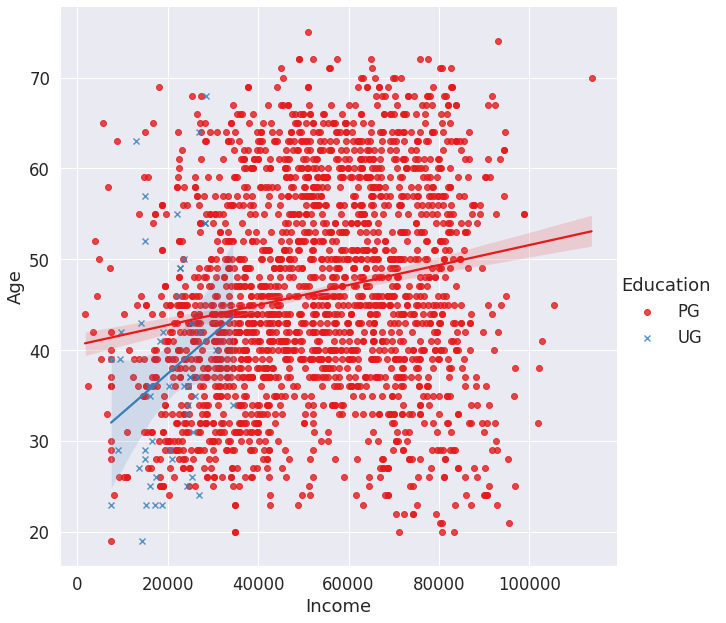

In [48]:
related_cols = ['Income']
relations('Age',others =related_cols, color = 'Education', data = data)

In [49]:
dist('Kids',c='Education')

Average PG Kids = 0.96
Most frequent PG Kids = 1
Average UG Kids = 0.72
Most frequent UG Kids = 1


In [50]:
dist('Kids',c='Marital_Status')

Average Single Kids = 0.91
Most frequent Single Kids = 1
Average relationship Kids = 0.97
Most frequent relationship Kids = 1


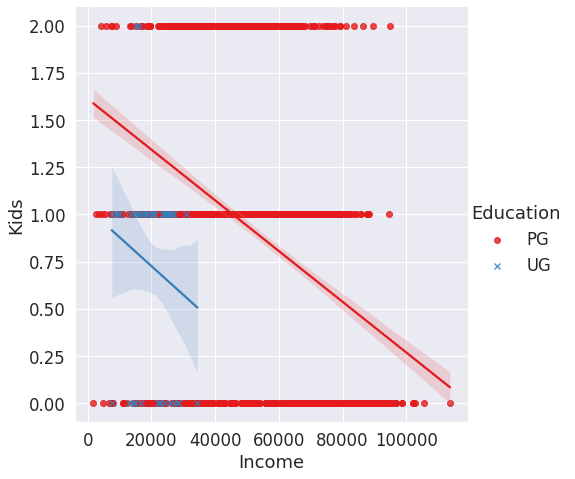

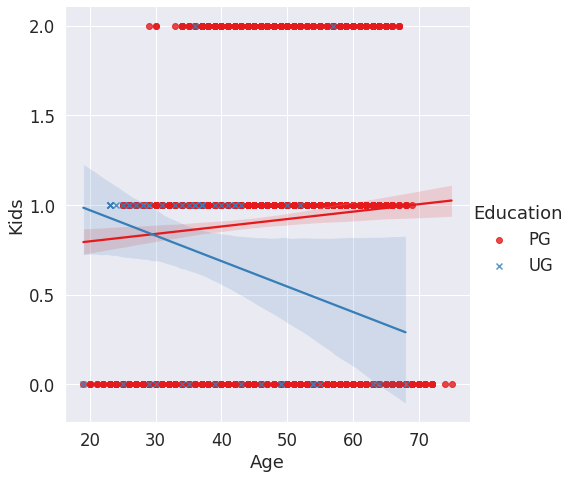

In [51]:
related_cols = ['Income','Age']
relations('Kids',others = related_cols,color = 'Education', size = 7)

In [52]:
dist('day_engaged',c='Education', nbins = 20)

Average PG day_engaged = 535.94
Most frequent PG day_engaged = 27
Average UG day_engaged = 623.07
Most frequent UG day_engaged = 200


In [53]:
dist('day_engaged',by='Marital_Status', nbins = 10)

Average Single day_engaged = 535.84
Most frequent Single day_engaged = 183
Average relationship day_engaged = 539.26
Most frequent relationship day_engaged = 853


In [54]:
dist('Recency',nbins = 25)

Average Recency = 49.11
Most frequent Recency = 56


In [55]:
precentages(['Marital_Status','Education','Complain'])

In [57]:
for numric in ['Income','Age','Kids','day_engaged','Recency']:
    dist(numric, c = 'Complain')

Average 0 Income = 52313.54
Most frequent 0 Income = 52247.25
Average 1 Income = 45242.29
Most frequent 1 Income = 38998.0


Average 0 Age = 46.16
Most frequent 0 Age = 39
Average 1 Age = 49.9
Most frequent 1 Age = 56


Average 0 Kids = 0.95
Most frequent 0 Kids = 1
Average 1 Kids = 1.19
Most frequent 1 Kids = 1


Average 0 day_engaged = 537.16
Most frequent 0 day_engaged = 853
Average 1 day_engaged = 631.1
Most frequent 1 day_engaged = 718


Average 0 Recency = 49.07
Most frequent 0 Recency = 56
Average 1 Recency = 53.05
Most frequent 1 Recency = 92


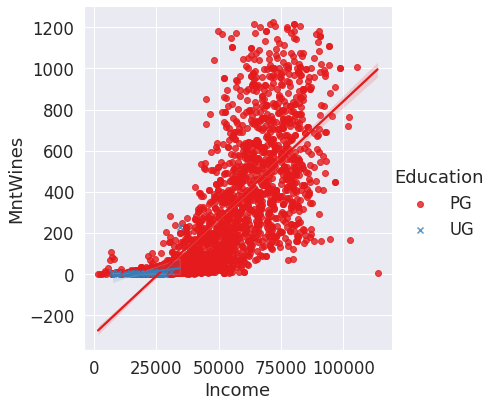

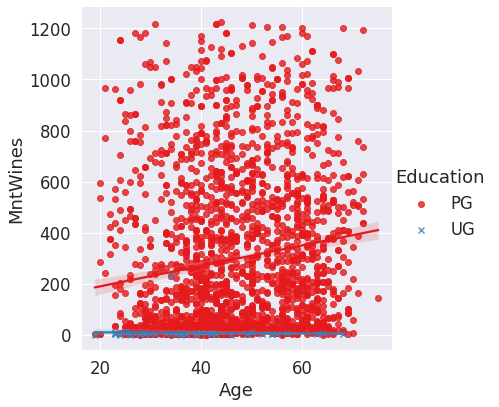

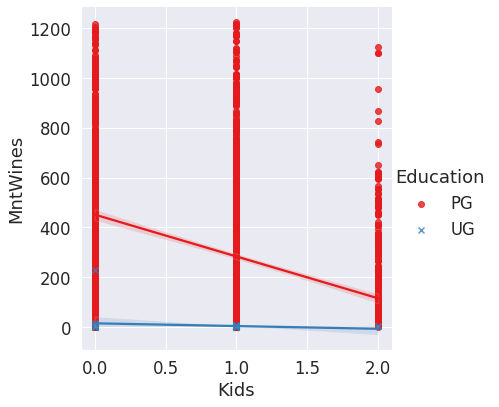

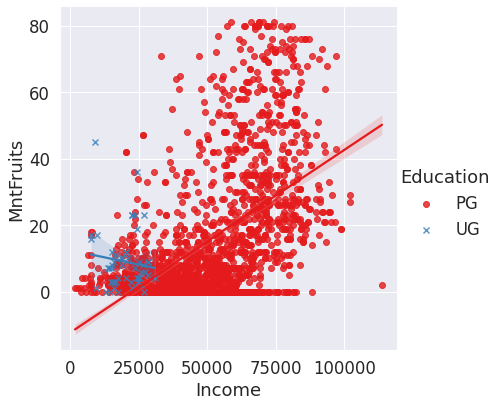

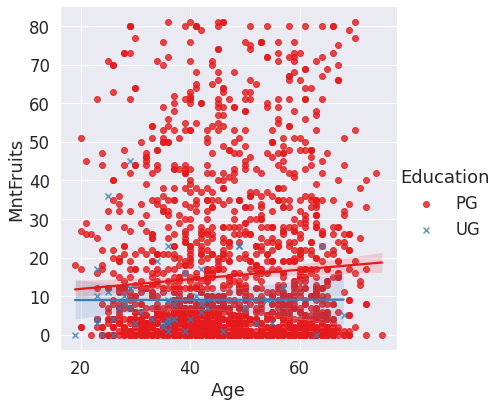

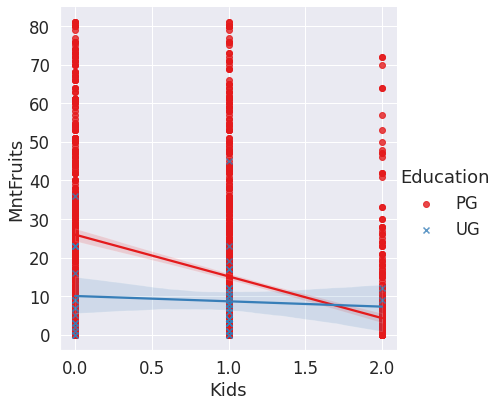

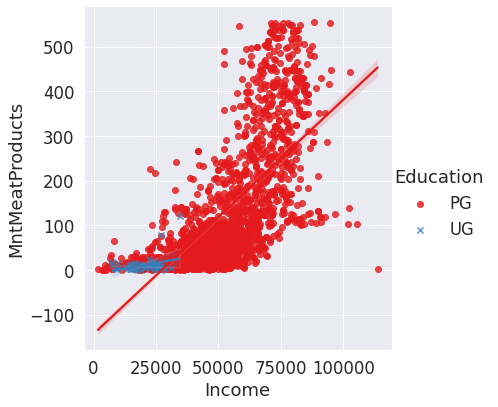

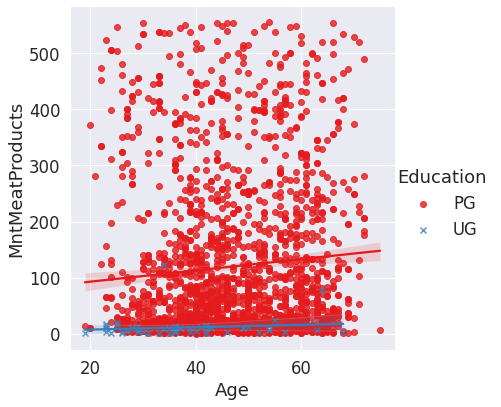

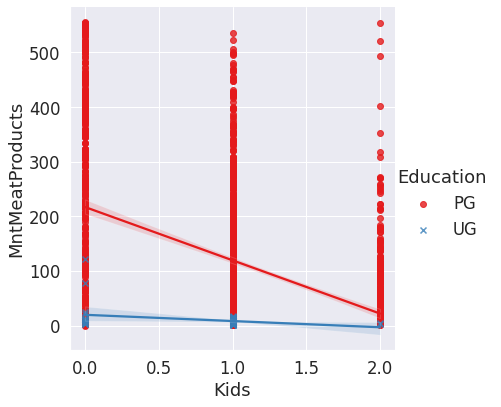

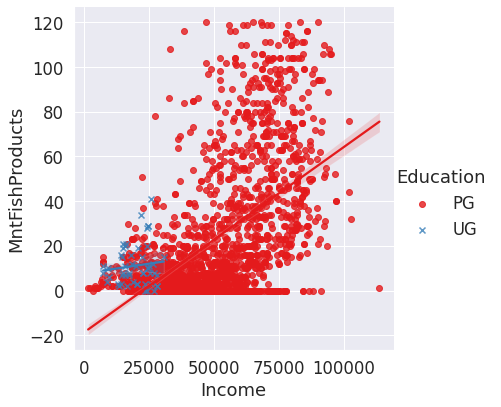

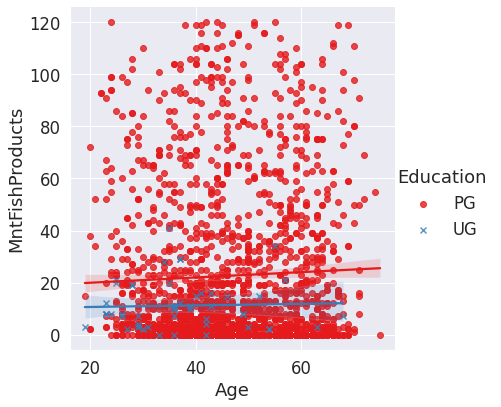

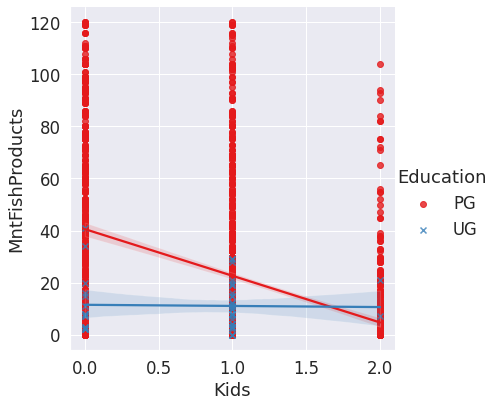

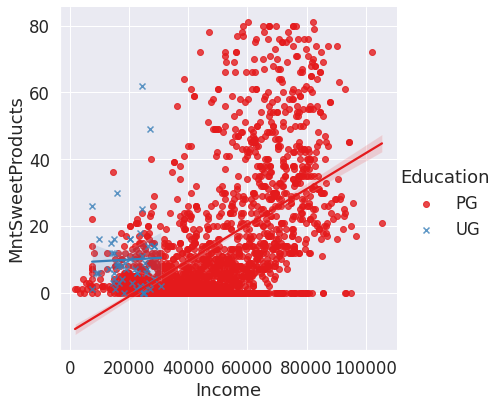

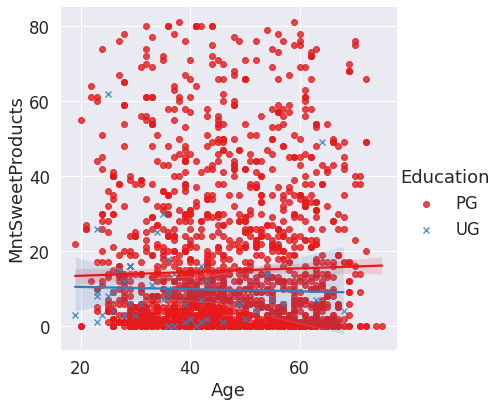

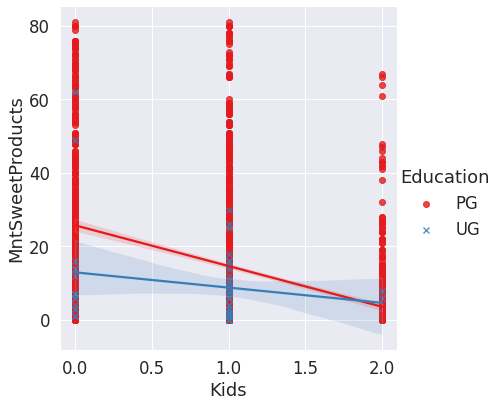

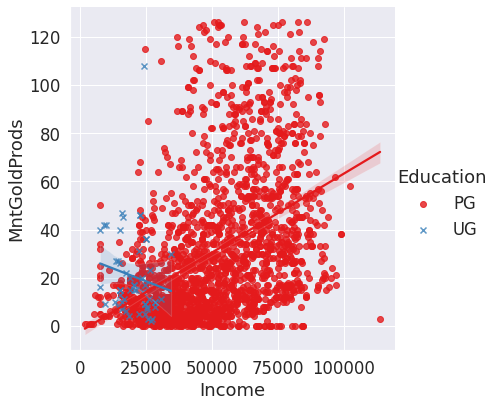

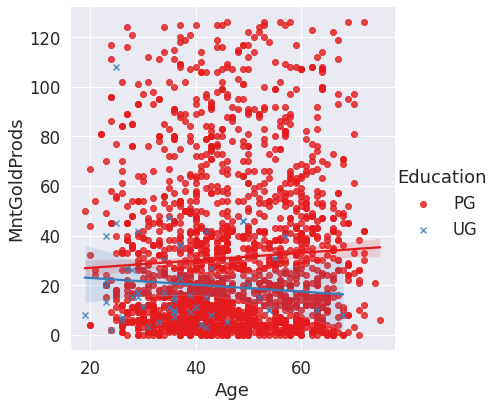

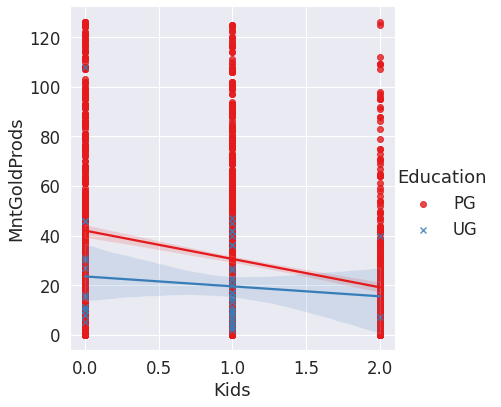

In [58]:
related_cols = ['Income','Age','Kids']
for mntproduct in ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']:
    relations(mntproduct,others = related_cols,color = 'Education', size = 6)

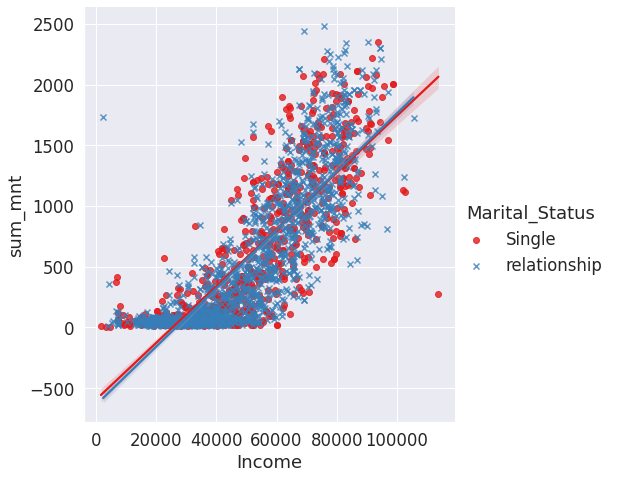

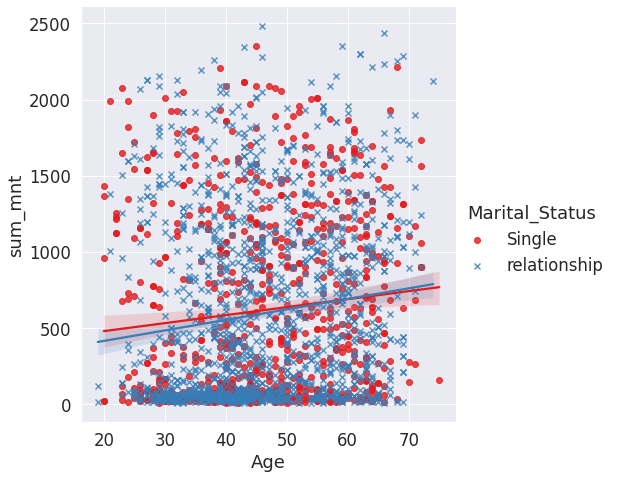

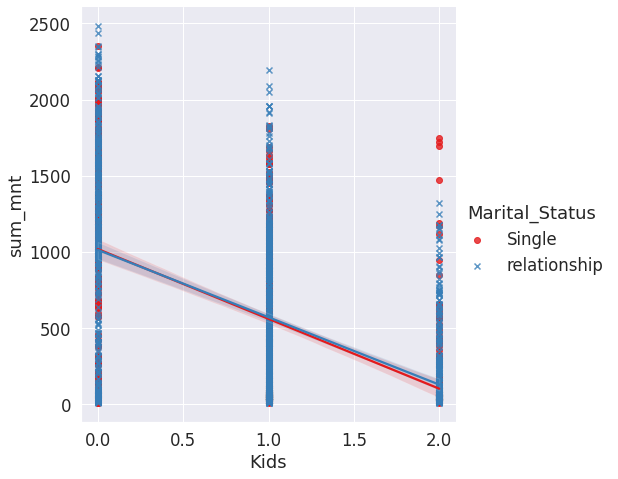

In [59]:
related_cols = ['Income','Age','Kids']
data['sum_mnt'] =  data.MntWines+data.MntFruits+data.MntMeatProducts+data.MntFishProducts+data.MntSweetProducts+data.MntGoldProds
relations('sum_mnt',others = related_cols,color = 'Marital_Status', size = 7)

In [60]:
for numric in ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']:
    for cat in ['Education','Marital_Status','Complain']:
        dist(numric, c = cat)

Average PG MntWines = 311.26
Most frequent PG MntWines = 5
Average UG MntWines = 7.24
Most frequent UG MntWines = 1


Average Single MntWines = 306.67
Most frequent Single MntWines = 4
Average relationship MntWines = 302.43
Most frequent relationship MntWines = 2


Average 0 MntWines = 305.21
Most frequent 0 MntWines = 2
Average 1 MntWines = 169.0
Most frequent 1 MntWines = 16


Average PG MntFruits = 26.68
Most frequent PG MntFruits = 0
Average UG MntFruits = 11.11
Most frequent UG MntFruits = 3


Average Single MntFruits = 27.61
Most frequent Single MntFruits = 0
Average relationship MntFruits = 25.58
Most frequent relationship MntFruits = 0


Average 0 MntFruits = 26.32
Most frequent 0 MntFruits = 0
Average 1 MntFruits = 24.19
Most frequent 1 MntFruits = 0


Average PG MntMeatProducts = 170.79
Most frequent PG MntMeatProducts = 7
Average UG MntMeatProducts = 11.44
Most frequent UG MntMeatProducts = 11


Average Single MntMeatProducts = 172.91
Most frequent Single MntMeatProducts = 8
Average relationship MntMeatProducts = 163.66
Most frequent relationship MntMeatProducts = 7


Average 0 MntMeatProducts = 167.47
Most frequent 0 MntMeatProducts = 7
Average 1 MntMeatProducts = 112.48
Most frequent 1 MntMeatProducts = 14


Average PG MntFishProducts = 38.03
Most frequent PG MntFishProducts = 0
Average UG MntFishProducts = 17.06
Most frequent UG MntFishProducts = 8


Average Single MntFishProducts = 38.79
Most frequent Single MntFishProducts = 0
Average relationship MntFishProducts = 36.83
Most frequent relationship MntFishProducts = 0


Average 0 MntFishProducts = 37.64
Most frequent 0 MntFishProducts = 0
Average 1 MntFishProducts = 25.76
Most frequent 1 MntFishProducts = 0


Average PG MntSweetProducts = 27.43
Most frequent PG MntSweetProducts = 0
Average UG MntSweetProducts = 12.11
Most frequent UG MntSweetProducts = 6


Average Single MntSweetProducts = 28.14
Most frequent Single MntSweetProducts = 0
Average relationship MntSweetProducts = 26.47
Most frequent relationship MntSweetProducts = 0


Average 0 MntSweetProducts = 27.15
Most frequent 0 MntSweetProducts = 0
Average 1 MntSweetProducts = 17.52
Most frequent 1 MntSweetProducts = 0


Average PG MntGoldProds = 44.55
Most frequent PG MntGoldProds = 1
Average UG MntGoldProds = 22.83
Most frequent UG MntGoldProds = 15


Average Single MntGoldProds = 46.07
Most frequent Single MntGoldProds = 1
Average relationship MntGoldProds = 42.89
Most frequent relationship MntGoldProds = 1


Average 0 MntGoldProds = 44.18
Most frequent 0 MntGoldProds = 1
Average 1 MntGoldProds = 27.48
Most frequent 1 MntGoldProds = 2


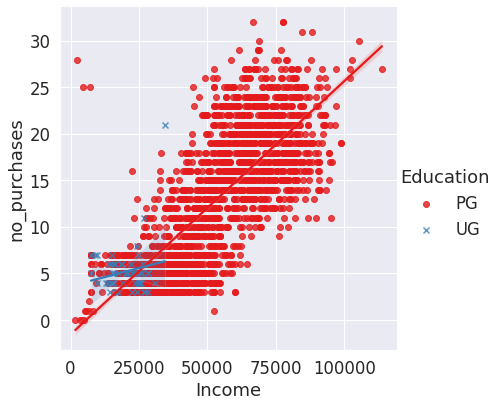

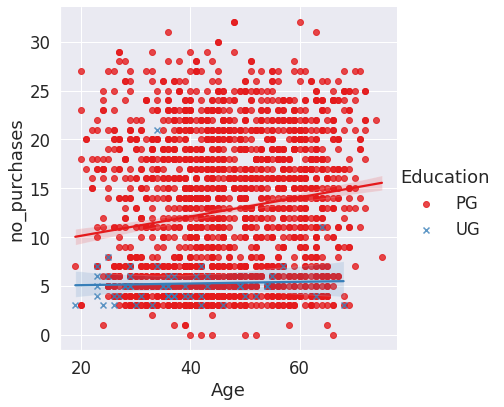

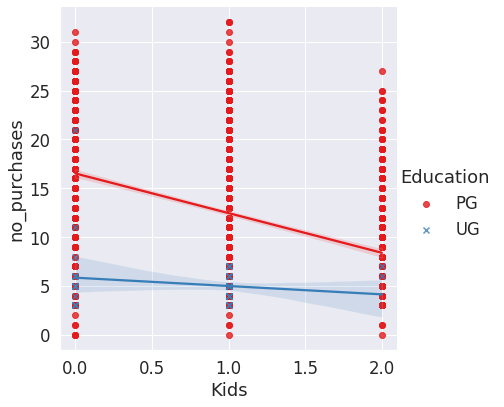

In [61]:
related_cols = ['Income','Age','Kids']
data['no_purchases'] = data.NumWebPurchases+data.NumCatalogPurchases+data.NumStorePurchases
relations('no_purchases',others = related_cols,color = 'Education', size = 6)

In [62]:
# Importing the ML libraries.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score 

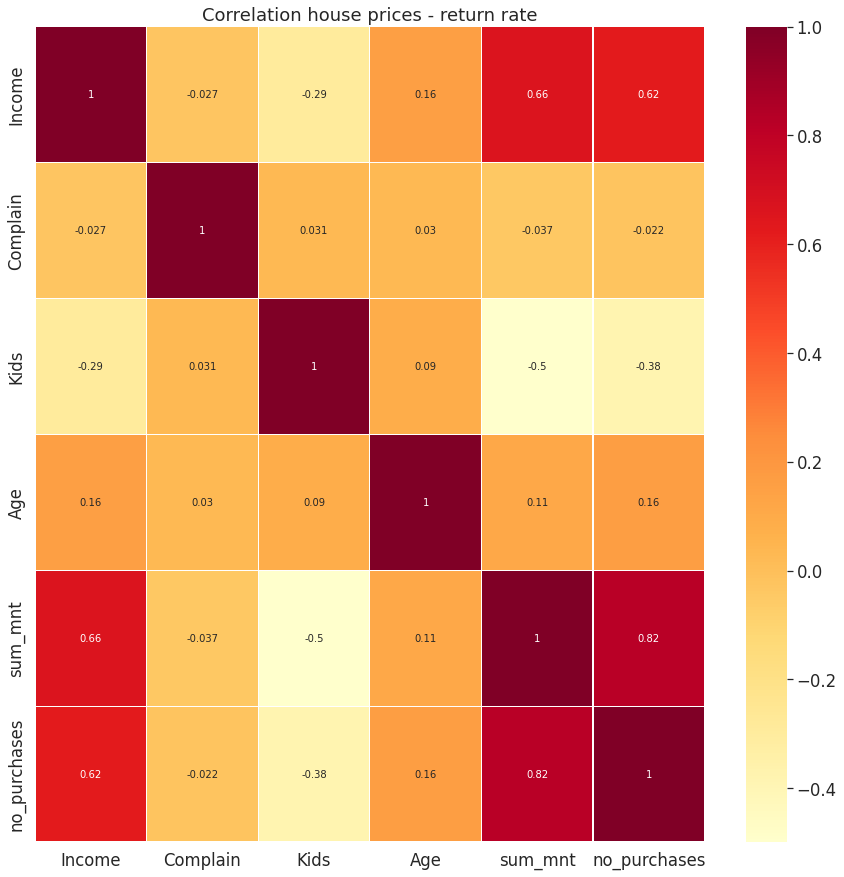

In [63]:
data.drop(['Recency','day_engaged','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
           'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
           'NumStorePurchases','NumWebVisitsMonth'],axis =1, inplace=True) # removing unnessary columns.

# Showing the correlation.
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cmap="YlOrRd", linewidths=0.1, annot_kws={"fontsize":10})
plt.title("Correlation house prices - return rate");

In [64]:
# Label Encoding the categorical data.
lbl_encode = LabelEncoder()
for i in ['Education','Marital_Status']:
    data[i]=data[[i]].apply(lbl_encode.fit_transform)
    
# Scaling the data. 
scaled_features = StandardScaler().fit_transform(data.values)
scaled_features_data = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)

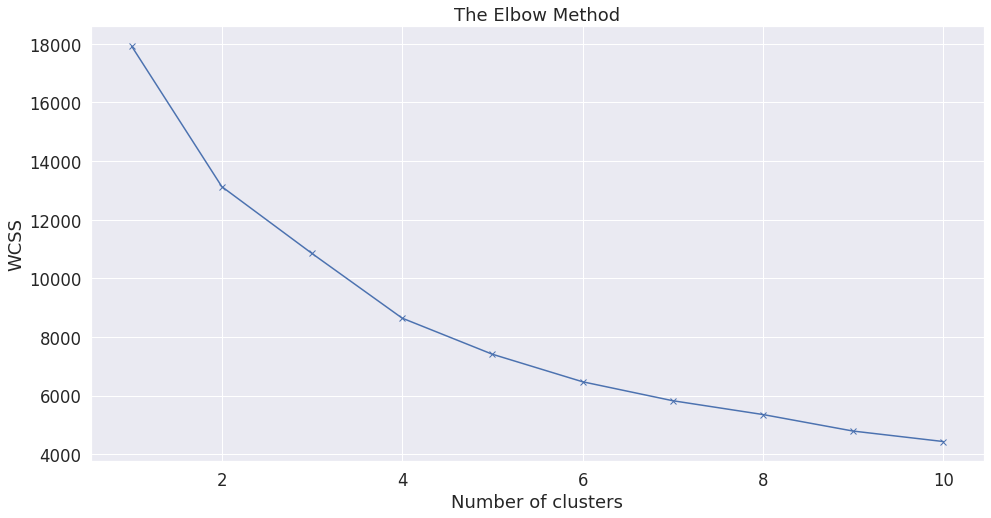

In [65]:
# Elbow method.
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

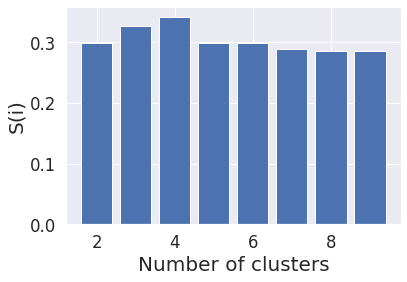

In [66]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_data)
    silhouette_scores.append(silhouette_score(scaled_features_data, m1.fit_predict(scaled_features_data))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [67]:
# Training and predicting using K-Means Algorithm with 3 N_clusters.

kmeans=KMeans(n_clusters=4, random_state=42).fit(scaled_features_data)
pred=kmeans.predict(scaled_features_data)


# Appending those cluster value into main dataframe (without standard-scalar)

data['cluster'] = pred + 1

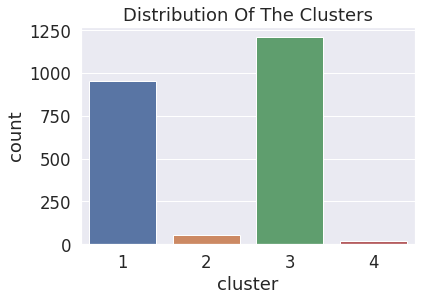

In [68]:
pl = sns.countplot(x=data["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [69]:
data[data.cluster == 1].describe()


,Education,Marital_Status,Income,Complain,Kids,Age,sum_mnt,no_purchases,cluster
count,956.00,956.00,956.00,956.00,956.00,956.00,956.00,956.00,956.00
mean,0.00,0.62,71484.75,0.00,0.52,48.44,1195.78,19.40,1.00
std,0.00,0.48,23674.10,0.00,0.59,12.35,447.37,4.20,0.00
min,0.00,0.00,2447.00,0.00,0.00,20.00,6.00,0.00,1.00
25%,0.00,0.00,62765.25,0.00,0.00,40.00,860.75,17.00,1.00
50%,0.00,1.00,70581.00,0.00,0.00,49.00,1146.50,19.00,1.00
75%,0.00,1.00,79143.75,0.00,1.00,59.00,1511.00,22.00,1.00
max,0.00,1.00,666666.00,0.00,3.00,116.00,2525.00,32.00,1.00


In [70]:
data[data.cluster == 2].describe()

,Education,Marital_Status,Income,Complain,Kids,Age,sum_mnt,no_purchases,cluster
count,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00
mean,1.00,0.63,20306.26,0.00,0.72,37.54,81.80,5.22,2.00
std,0.00,0.49,6235.07,0.00,0.53,11.54,123.23,2.65,0.00
min,1.00,0.00,7500.00,0.00,0.00,19.00,14.00,3.00,2.00
25%,1.00,0.00,15405.25,0.00,0.00,29.00,29.75,4.00,2.00
50%,1.00,1.00,20744.00,0.00,1.00,36.00,57.00,5.00,2.00
75%,1.00,1.00,24882.00,0.00,1.00,42.75,80.00,6.00,2.00
max,1.00,1.00,34445.00,0.00,2.00,68.00,839.00,21.00,2.00


In [71]:
data[data.cluster == 3].describe()

,Education,Marital_Status,Income,Complain,Kids,Age,sum_mnt,no_purchases,cluster
count,1209.00,1209.00,1209.00,1209.00,1209.00,1209.00,1209.00,1209.00,1209.00
mean,0.00,0.66,38583.79,0.00,1.29,44.74,166.67,7.46,3.00
std,0.00,0.47,13595.61,0.00,0.69,11.09,169.23,3.92,0.00
min,0.00,0.00,1730.00,0.00,0.00,19.00,5.00,0.00,3.00
25%,0.00,0.00,29604.00,0.00,1.00,37.00,44.00,4.00,3.00
50%,0.00,1.00,38360.00,0.00,1.00,43.00,88.00,6.00,3.00
75%,0.00,1.00,48006.00,0.00,2.00,52.00,263.00,10.00,3.00
max,0.00,1.00,162397.00,0.00,3.00,122.00,1052.00,25.00,3.00


In [72]:
data[data.cluster == 4].describe()

,Education,Marital_Status,Income,Complain,Kids,Age,sum_mnt,no_purchases,cluster
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,0.00,0.62,45242.29,1.00,1.19,49.90,376.43,10.90,4.00
std,0.00,0.50,19223.16,0.00,0.81,20.92,432.10,8.07,0.00
min,0.00,0.00,15716.00,1.00,0.00,20.00,11.00,3.00,4.00
25%,0.00,0.00,36640.00,1.00,1.00,36.00,54.00,5.00,4.00
50%,0.00,1.00,38998.00,1.00,1.00,51.00,92.00,7.00,4.00
75%,0.00,1.00,58113.00,1.00,2.00,61.00,637.00,16.00,4.00
max,0.00,1.00,83257.00,1.00,3.00,115.00,1365.00,27.00,4.00
